In [2]:
import fastcore.all as fc
import mediapipe as mp
from lipsync.create_ds.mediapipe_landmarks import FaceLandmarks
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


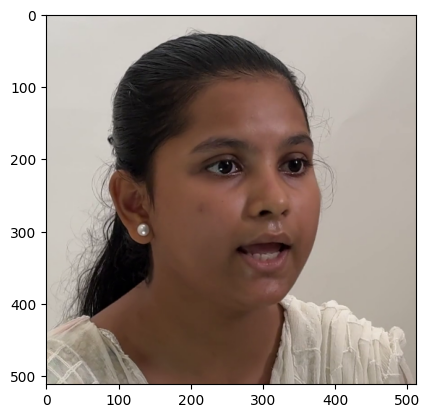

In [97]:
folders = fc.L(fc.Path("/data/prakash_lipsync/video_hallo_512/iv_recording_v2/").glob("*"))
folder = folders[np.random.randint(0, len(folders))]
bins = fc.L(folder.glob("*"))
imgs = bins[np.random.randint(0, len(bins))].glob("*.png")
imgs = fc.L(imgs)
imgs.sort()
plt.imshow(np.asarray(Image.open(imgs[0])))
plt.show()

In [193]:
imgs = fc.L(fc.Path("assets2/storage_crop").glob("*.png"))
imgs.sort()
imgs

(#112) [Path('assets2/storage_crop/000000.png'),Path('assets2/storage_crop/000001.png'),Path('assets2/storage_crop/000002.png'),Path('assets2/storage_crop/000003.png'),Path('assets2/storage_crop/000004.png'),Path('assets2/storage_crop/000005.png'),Path('assets2/storage_crop/000006.png'),Path('assets2/storage_crop/000007.png'),Path('assets2/storage_crop/000008.png'),Path('assets2/storage_crop/000009.png')...]

In [194]:
fl = FaceLandmarks("../weights/face_landmarker.task")
face_landmarks, hw, frame_numbers = fl.process_frames(imgs)
face_landmarks.shape


0it [00:00, ?it/s]I0000 00:00:1734615511.144248 2145948 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1734615511.236421 2207408 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.90.07), renderer: NVIDIA H200/PCIe/SSE2
W0000 00:00:1734615511.237026 2145948 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1734615511.245867 2207410 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734615511.263970 2207425 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
1it [00:00,  5.88it/s]I0000 00:00:1734615511.314743 2145948 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1734615511.404179 2207458 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.90.07), re

(112, 478, 2)

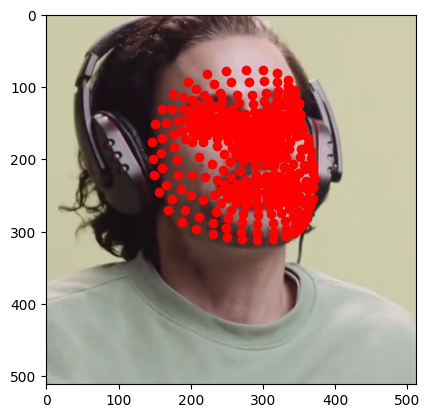

In [195]:
#visualize landmarks 
k = np.random.randint(0, len(imgs))
k = 38
img = np.asarray(Image.open(imgs[k]))
plt.imshow(img)
plt.scatter(face_landmarks[k, :, 0], face_landmarks[k, :, 1], c="r")
plt.show()

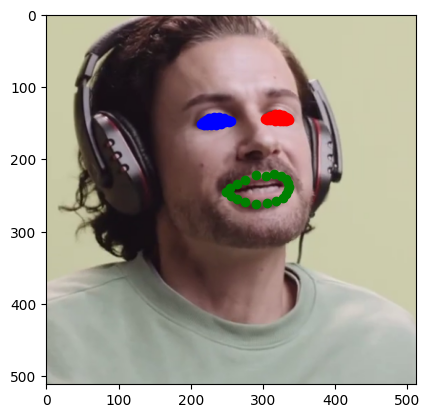

In [196]:
# Left eye and right eye landmarks 
LEFT_EYE = [362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385, 384, 398]
RIGHT_EYE = [33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161, 246]
LIP_IDS = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291,
           146, 91, 181, 84, 17, 314, 405, 321, 375]

img = np.asarray(Image.open(imgs[k]))
plt.imshow(img)
plt.scatter(face_landmarks[k, LEFT_EYE, 0], face_landmarks[k, LEFT_EYE, 1], c="r")
plt.scatter(face_landmarks[k, RIGHT_EYE, 0], face_landmarks[k, RIGHT_EYE, 1], c="b")
plt.scatter(face_landmarks[k, LIP_IDS, 0], face_landmarks[k, LIP_IDS, 1], c="g")
plt.show()

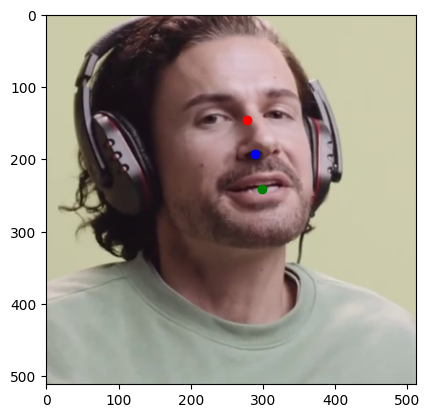

In [197]:
eye_center = np.mean(face_landmarks[k, LEFT_EYE+RIGHT_EYE, :], 0)
lip_center = np.mean(face_landmarks[k, LIP_IDS, :], 0)
f_landmarks = (eye_center + lip_center)/2
plt.imshow(img)
plt.scatter(eye_center[0], eye_center[1], c="r")
plt.scatter(lip_center[0], lip_center[1], c="g")
plt.scatter(f_landmarks[0], f_landmarks[1], c="b")
plt.show()


In [198]:
mask = [64*2, 112*2, 192*2, 240*2]
mask

[128, 224, 384, 480]

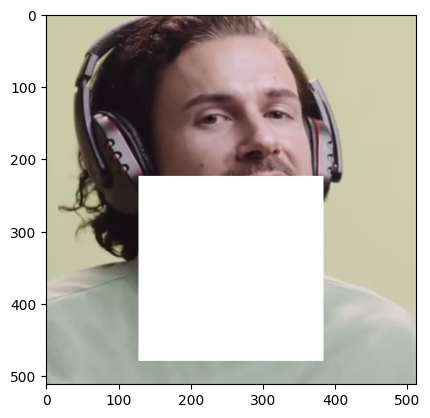

In [199]:
nimg = img.copy()
nimg[mask[1]:mask[3], mask[0]:mask[2], :] = 255
plt.imshow(nimg)
plt.show()



In [200]:
x, y = np.round(f_landmarks)
x1 = 96
x2 = 512-96
y1 = int(y-32)
y2 = int(512-32)
x1, y1, x2, y2


(96, 161, 416, 480)

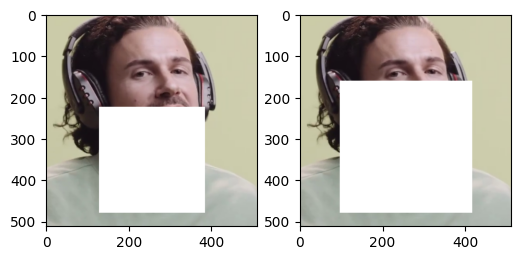

In [201]:
nimg = img.copy()
nimg[mask[1]:mask[3], mask[0]:mask[2], :] = 255
nimg2 = img.copy()
nimg2[y1:y2, x1:x2, :] = 255
fig, ax = plt.subplots(figsize=(6, 3), ncols=2, nrows=1)
ax[0].imshow(nimg)
ax[1].imshow(nimg2)
plt.show()



In [191]:
from lipsync.utils import load_json 
ds_name = "iv_recording_v2"
landmarks_dir = fc.Path(f"/data/mp_lms/{ds_name}")
bins_path = fc.Path(f"/data/prakash_lipsync/video_hallo_512/bins/{ds_name}")
x = load_json(f"/data/prakash_lipsync/v1/{ds_name}/train_hallo.json")
videos = fc.L(x.keys())

In [183]:
video = videos[np.random.randint(0, len(videos))]
landmarks = np.load(landmarks_dir / (video+".npy"))
bbox = np.load(bins_path / (video+".npy"))
video

'fscpG9LF3-c--0006'

In [184]:
bins = x[video]["clips"]
bin = bins[np.random.randint(0, len(bins))]
bin

{'folder_name': '000249',
 'images': ['001247.png',
  '001248.png',
  '001249.png',
  '001250.png',
  '001251.png'],
 'start_audio': 1245,
 'end_audio': 1253,
 'silence': 0}

In [187]:
imgs_root = fc.Path(f"/data/prakash_lipsync/video_hallo_512/hdtf/{video}")
img = imgs_root / bin["folder_name"] / bin["images"][0]
img


Path('/data/prakash_lipsync/video_hallo_512/hdtf/fscpG9LF3-c--0006/000249/001247.png')

In [188]:
_, frame_number, x1, y1, x2, y2 = bbox[np.random.randint(0, len(bbox))][0]
x1, y1, x2, y2, frame_number

(332, 37, 868, 573, 222)

In [189]:
lm = landmarks[frame_number, :, :2].copy()

def realign_landmarks(lm, x1, y1, x2, y2):
    lm[:, 0] = (lm[:, 0] - x1)/(x2-x1)*512
    lm[:, 1] = (lm[:, 1] - y1)/(y2-y1)*512
    return lm

lm = realign_landmarks(lm, x1, y1, x2, y2)
lm.shape

(478, 2)

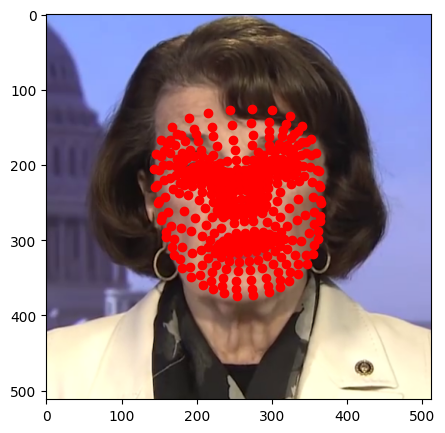

In [190]:
image = np.asarray(Image.open(img))
#plot landmarks 
plt.figure(figsize=(10, 5))
# draw a rectangle  using height and width 
plt.imshow(image)
# draw bbox using x1, y1, x2, y2
#plt.plot([x1, x2, x2, x1], [y1, y1, y2, y2], c="g")
plt.scatter(lm[:, 0], lm[:, 1], c="r")
plt.show()



In [140]:
image.shape

(512, 512, 3)

In [192]:
21018*5*250

26272500